<a href="https://colab.research.google.com/github/LennyRBriones/neural-networks-practices/blob/main/brain_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

local_zip = "/tmp/brain_class.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/brain_class")
zip_ref.close()

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = "/tmp/brain_class/Training"
test_dir = "/tmp/brain_class/Testing"

## Data Generators

In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2) #split in 20% to validate the performance

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 28,
    class_mode = "categorical",
    color_mode = "grayscale",
)


Found 5712 images belonging to 4 classes.
Found 262 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
classes = ["glioma","meningioma", "notumor", "pituitary"]

In [7]:
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [8]:
def plotimages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize =(10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

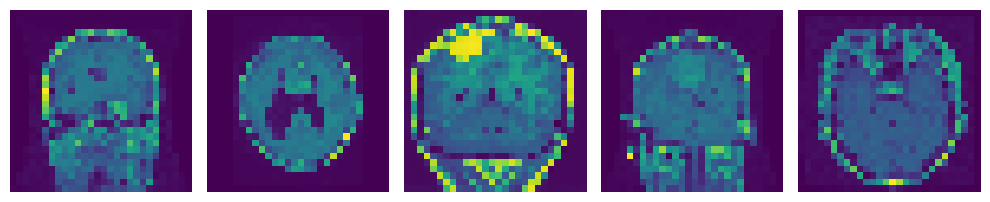

In [9]:
sample_training_images, _ = next(train_generator)
plotimages(sample_training_images[11:16])

In [10]:
base_model = tf.keras.models.Sequential([
                                        tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
                                        tf.keras.layers.Dense(56, activation = "relu"),
                                        tf.keras.layers.Dense(28, activation = "relu"),
                                        tf.keras.layers.Dense(len(classes), activation ="softmax")
])

In [11]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 56)                43960     
                                                                 
 dense_1 (Dense)             (None, 28)                1596      
                                                                 
 dense_2 (Dense)             (None, 4)                 116       
                                                                 
Total params: 45,672
Trainable params: 45,672
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = base_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator

)


Epoch 1/10
 14/204 [=>............................] - ETA: 19s - loss: 1.3130 - accuracy: 0.3367

KeyboardInterrupt: ignored

In [ ]:
results = base_model.evaluate(test_generator)

47/47 [==============================] - 3s 60ms/step - loss: 0.3842 - accuracy: 0.8612


In [12]:
def visualization_results(history):
  epochs = [i for i in range(10)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label ="training accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label ="validation accuracy")
  ax[0].set_title("Training & validation accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label ="training loss")
  ax[1].plot(epochs, val_loss, "ro-", label ="validation loss")
  ax[1].set_title("Training & validation loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("loss")

  plt.show()

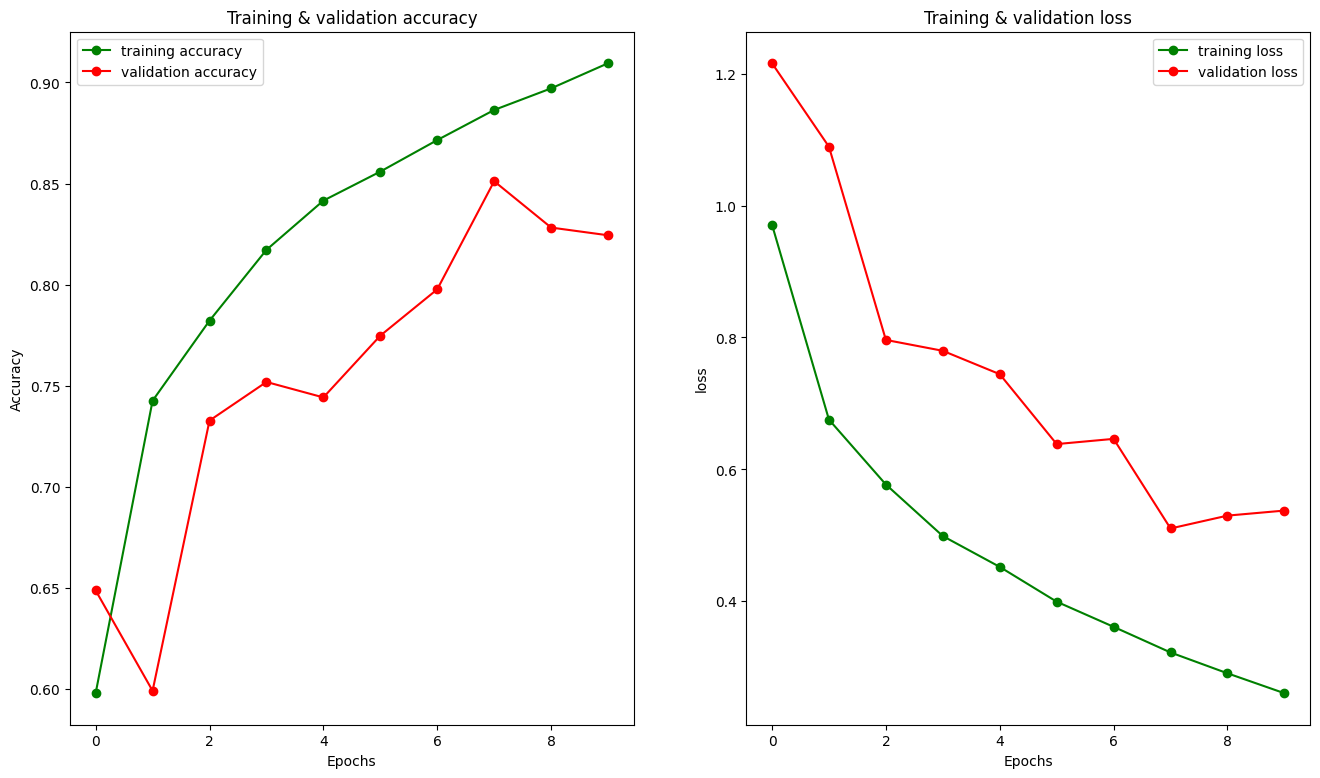

In [ ]:
visualization_results(history)

In [13]:
from tensorflow.keras import regularizers

In [14]:
optimized_model = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

optimized_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 56)                43960     
                                                                 
 dropout (Dropout)           (None, 56)                0         
                                                                 
 dense_4 (Dense)             (None, 28)                1596      
                                                                 
 dropout_1 (Dropout)         (None, 28)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 116       
                                                                 
Total params: 45,672
Trainable params: 45,672
Non-trai

In [ ]:
optimized_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = optimized_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - 19s 87ms/step - loss: 1.1132 - accuracy: 0.5060 - val_loss: 1.0791 - val_accuracy: 0.6450
Epoch 2/10
204/204 [==============================] - 18s 88ms/step - loss: 0.8064 - accuracy: 0.6843 - val_loss: 1.0131 - val_accuracy: 0.6374
Epoch 3/10
204/204 [==============================] - 17s 86ms/step - loss: 0.6897 - accuracy: 0.7353 - val_loss: 0.8789 - val_accuracy: 0.6985
Epoch 4/10
204/204 [==============================] - 18s 88ms/step - loss: 0.6044 - accuracy: 0.7749 - val_loss: 0.8535 - val_accuracy: 0.7061
Epoch 5/10
204/204 [==============================] - 18s 86ms/step - loss: 0.5402 - accuracy: 0.7917 - val_loss: 0.8643 - val_accuracy: 0.7405
Epoch 6/10
204/204 [==============================] - 18s 90ms/step - loss: 0.4904 - accuracy: 0.8239 - val_loss: 0.7982 - val_accuracy: 0.7519
Epoch 7/10
204/204 [==============================] - 19s 92ms/step - loss: 0.4656 - accuracy: 0.8270 - val_loss: 0.7546 - val_accuracy:

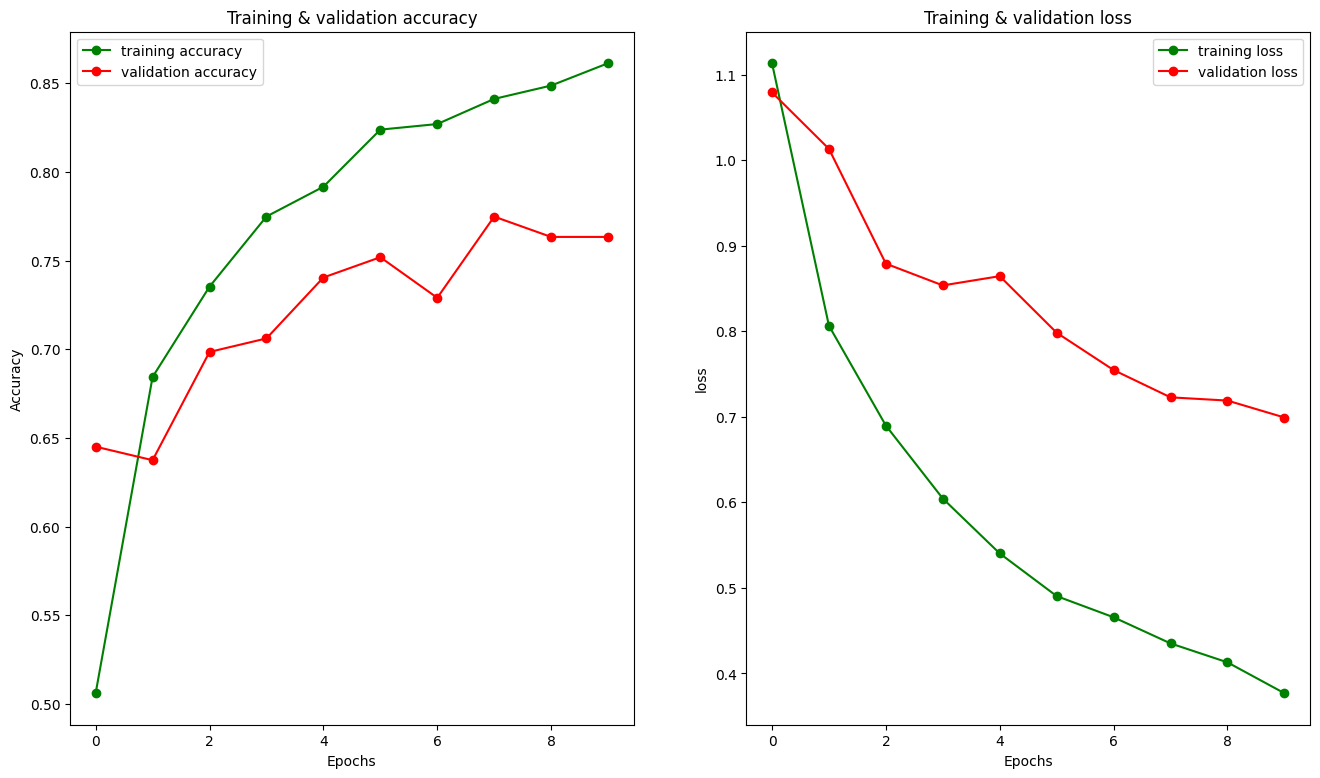

In [ ]:
visualization_results(history_optimizer)

In [ ]:
convolutional_model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(50, (3,3), activation= "relu", input_shape = (28,28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

convolutional_model.summary()

convolutional_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = convolutional_model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 8450)              0         
                                                                 
 dense_6 (Dense)             (None, 56)                473256    
                                                                 
 dropout_2 (Dropout)         (None, 56)                0         
                                                                 
 dense_7 (Dense)             (None, 28)                1596      
                                                      

KeyboardInterrupt: ignored

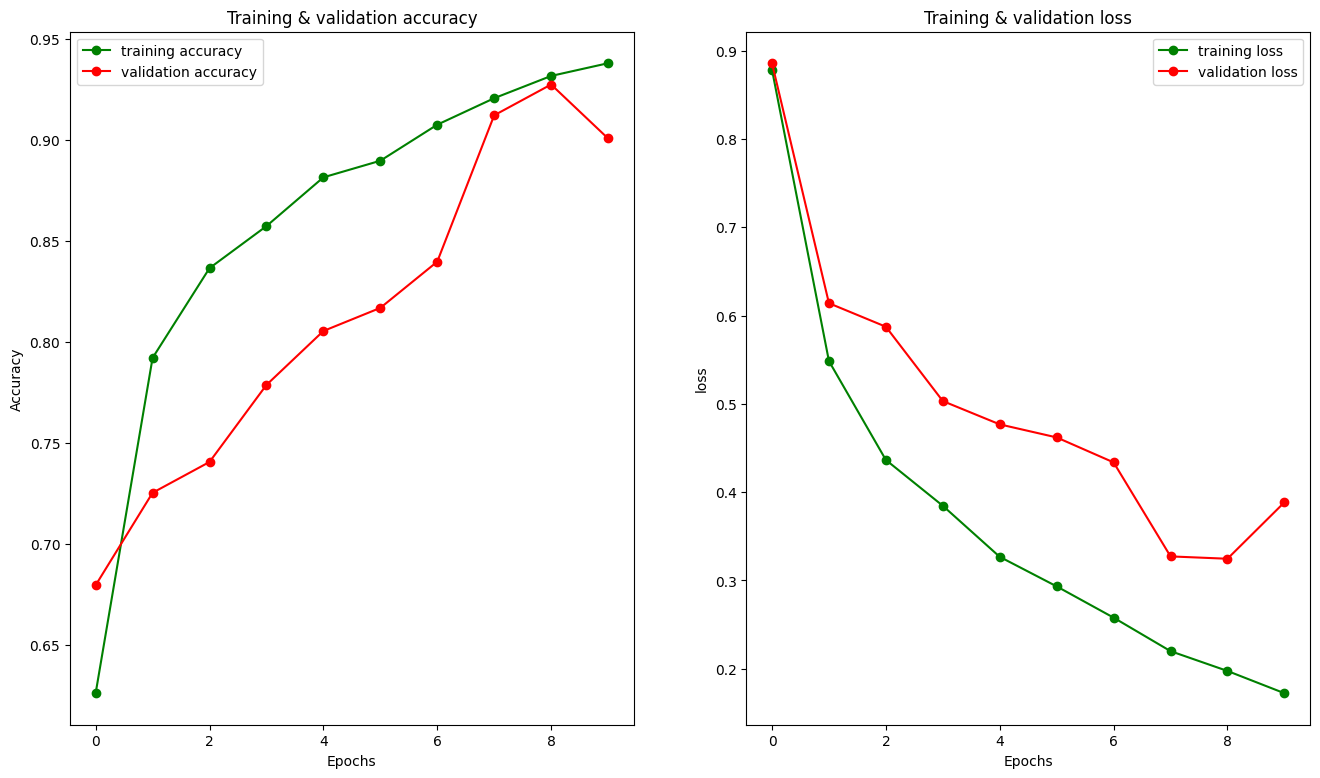

In [ ]:
visualization_results(history_convolutional)

## Using Callbacks

In [15]:
callback_model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(50, (3,3), activation= "relu", input_shape = (28,28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(56, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(28, kernel_regularizer = regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation ="softmax")
])

callback_model.summary()

callback_model.compile(optimizer= "adam", loss ="categorical_crossentropy", metrics = ["accuracy"])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 50)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 8450)              0         
                                                                 
 dense_6 (Dense)             (None, 56)                473256    
                                                                 
 dropout_2 (Dropout)         (None, 56)                0         
                                                                 
 dense_7 (Dense)             (None, 28)                1596      
                                                      

In [16]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Done, the model gets 95%, stopping training")
      self.model.stop_training = True

In [ ]:
callback = TrainingCallback()

history_callback = callback_model.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
204/204 [==============================] - 24s 113ms/step - loss: 0.9014 - accuracy: 0.6194 - val_loss: 0.7890 - val_accuracy: 0.6870
Epoch 2/20
204/204 [==============================] - 22s 109ms/step - loss: 0.5529 - accuracy: 0.7871 - val_loss: 0.7539 - val_accuracy: 0.7023
Epoch 3/20
204/204 [==============================] - 23s 113ms/step - loss: 0.4650 - accuracy: 0.8244 - val_loss: 0.6087 - val_accuracy: 0.7366
Epoch 4/20
204/204 [==============================] - 22s 106ms/step - loss: 0.3993 - accuracy: 0.8487 - val_loss: 0.5666 - val_accuracy: 0.7519
Epoch 5/20
204/204 [==============================] - 22s 106ms/step - loss: 0.3584 - accuracy: 0.8699 - val_loss: 0.4910 - val_accuracy: 0.7863
Epoch 6/20
204/204 [==============================] - 23s 112ms/step - loss: 0.3046 - accuracy: 0.8874 - val_loss: 0.4395 - val_accuracy: 0.7901
Epoch 7/20
204/204 [==============================] - 23s 112ms/step - loss: 0.2744 - accuracy: 0.8964 - val_loss: 0.4444 - val_ac

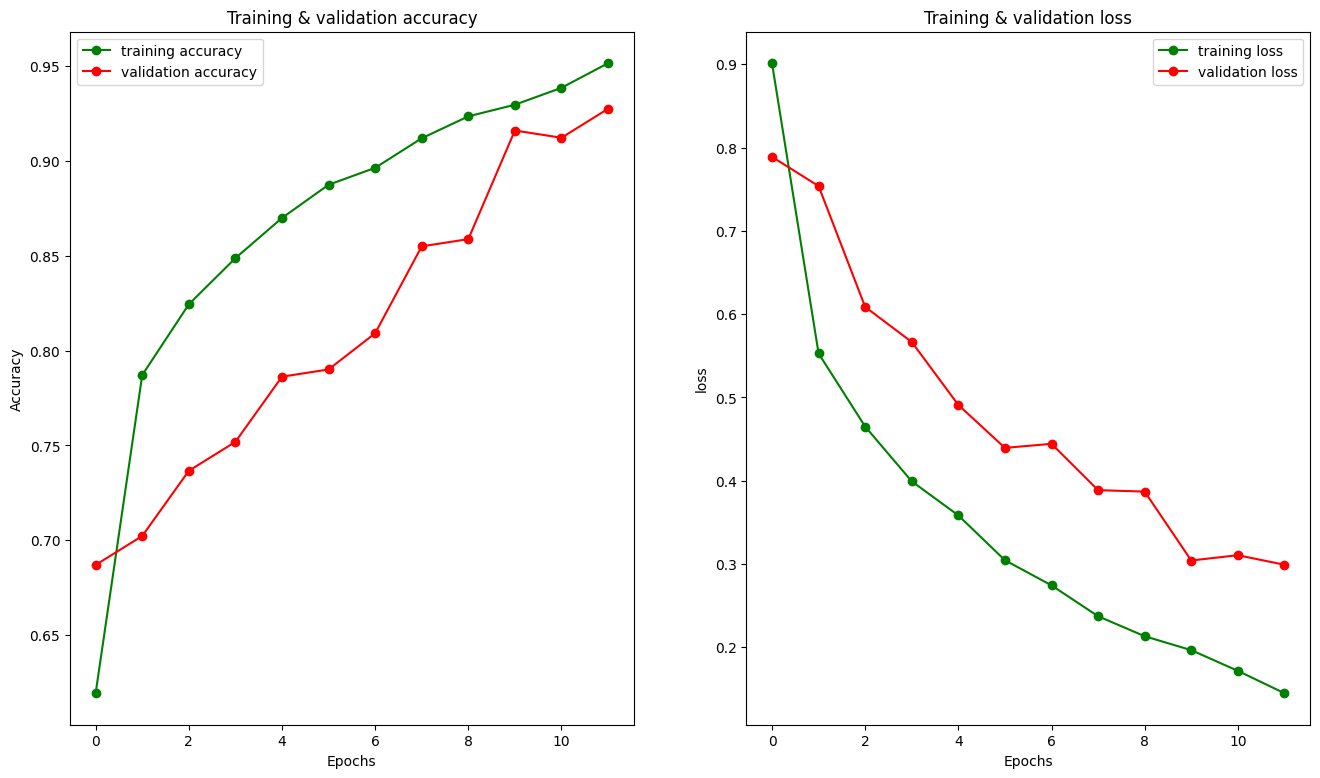

In [ ]:
visualization_results(history_callback)

## Early Stopping & patience

In [17]:
def get_model():
   model = tf.keras.models.Sequential([
             tf.keras.layers.Conv2D(25, (3,3), activation = "relu", input_shape = (28, 28,1)),
             tf.keras.layers.MaxPool2D((2,2)),
             tf.keras.layers.Flatten(),
             tf.keras.layers.Dense(56, kernel_regularizer= regularizers.l2(1e-5), activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(28, kernel_regularizer= regularizers.l2(1e-5), activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(len(classes), activation ="softmax")
   ])
   return model

model_early =  get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 25)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4225)              0         
                                                                 
 dense_9 (Dense)             (None, 56)                236656    
                                                                 
 dropout_4 (Dropout)         (None, 56)                0         
                                                                 
 dense_10 (Dense)            (None, 28)                1596      
                                                      

In [18]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3, mode = "auto") #it could be min or max depends of the metric


In [ ]:
history_early = model_early.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/20
204/204 [==============================] - 23s 99ms/step - loss: 0.9402 - accuracy: 0.5938 - val_loss: 0.9262 - val_accuracy: 0.6336
Epoch 2/20
204/204 [==============================] - 20s 97ms/step - loss: 0.5903 - accuracy: 0.7766 - val_loss: 0.7397 - val_accuracy: 0.6870
Epoch 3/20
204/204 [==============================] - 23s 111ms/step - loss: 0.4801 - accuracy: 0.8144 - val_loss: 0.6441 - val_accuracy: 0.7252
Epoch 4/20
204/204 [==============================] - 22s 108ms/step - loss: 0.4120 - accuracy: 0.8498 - val_loss: 0.4859 - val_accuracy: 0.7557
Epoch 5/20
204/204 [==============================] - 23s 112ms/step - loss: 0.3543 - accuracy: 0.8722 - val_loss: 0.5326 - val_accuracy: 0.7710
Epoch 6/20
204/204 [==============================] - 20s 97ms/step - loss: 0.3164 - accuracy: 0.8880 - val_loss: 0.4415 - val_accuracy: 0.7901
Epoch 7/20
204/204 [==============================] - 23s 111ms/step - loss: 0.2857 - accuracy: 0.9014 - val_loss: 0.4055 - val_accur

## kerasTuner

In [19]:
! pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 10.0 MB/s eta 0:00:00


In [20]:
def model_constructor(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(25, (3,3), activation ="relu", input_shape = (28,28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  #Dynamic generator of neurons
  hp_units = hp.Int("units", min_value = 4, max_value = 52, step = 4)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu", kernel_regularizer = regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(28, activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax" ))

  hp_learning_rate = hp.Choice("learning_rate", values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate= hp_learning_rate), loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

In [21]:
tuner = kt.Hyperband(
    model_constructor,
    objective = "val_accuracy", #to see generalization in new data
    max_epochs=10,
    factor = 3,
    directory = "models/",
    project_name = "brain-tunner"
)

In [22]:
tuner.search(train_generator, epochs = 10, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
                                          #trials help us to re-test the result

Trial 30 Complete [00h 02m 57s]
val_accuracy: 0.8969465494155884

Best val_accuracy So Far: 0.9045801758766174
Total elapsed time: 00h 37m 26s


In [23]:
print(best_hps.get("units")) #to get the best configuration of neurons

28


In [24]:
print(best_hps.get("learning_rate")) #to get the best configuration of learning rate

0.01


## Creating a Model with the best values

In [25]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_generator,
    epochs = 10,
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - 16s 73ms/step - loss: 0.8027 - accuracy: 0.6656 - val_loss: 0.9564 - val_accuracy: 0.6718
Epoch 2/10
204/204 [==============================] - 18s 88ms/step - loss: 0.5476 - accuracy: 0.7887 - val_loss: 0.6596 - val_accuracy: 0.7176
Epoch 3/10
204/204 [==============================] - 15s 71ms/step - loss: 0.4693 - accuracy: 0.8186 - val_loss: 0.5499 - val_accuracy: 0.7710
Epoch 4/10
204/204 [==============================] - 15s 71ms/step - loss: 0.4234 - accuracy: 0.8353 - val_loss: 0.4850 - val_accuracy: 0.8168
Epoch 5/10
204/204 [==============================] - 14s 70ms/step - loss: 0.3917 - accuracy: 0.8505 - val_loss: 0.5197 - val_accuracy: 0.8015
Epoch 6/10
204/204 [==============================] - 14s 70ms/step - loss: 0.3782 - accuracy: 0.8613 - val_loss: 0.5654 - val_accuracy: 0.7939
Epoch 7/10
204/204 [==============================] - 14s 70ms/step - loss: 0.3550 - accuracy: 0.8662 - val_loss: 0.5735 - val_accuracy:

In [26]:
# to save the config of the model
config_dict = hypermodel.get_config()

In [27]:
print(config_dict)

{'name': 'sequential_1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_1_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 28, 28, 1), 'filters': 25, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

In [28]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [29]:
model_same_config.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 25)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4225)              0         
                                                                 
 dense_3 (Dense)             (None, 28)                118328    
                                                                 
 dropout_2 (Dropout)         (None, 28)                0         
                                                                 
 dense_4 (Dense)             (None, 28)                812       
                                                      

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 25)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4225)              0         
                                                                 
 dense_6 (Dense)             (None, 56)                236656    
                                                                 
 dropout_4 (Dropout)         (None, 56)                0         
                                                                 
 dense_7 (Dense)             (None, 28)                1596      
                                                      

In [32]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [35]:
checkpoint_path = "model_checkpoints/checkpoint"
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1 #show us information during training
)

In [34]:
history_weigth = model_weight.fit(
    train_generator,
    epochs = 10,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - ETA: 0s - loss: 0.9285 - accuracy: 0.5952
Epoch 1: saving model to model_checkpoints/checkpoint
204/204 [==============================] - 17s 79ms/step - loss: 0.9285 - accuracy: 0.5952 - val_loss: 1.0762 - val_accuracy: 0.6069
Epoch 2/10
204/204 [==============================] - ETA: 0s - loss: 0.5979 - accuracy: 0.7777
Epoch 2: saving model to model_checkpoints/checkpoint
204/204 [==============================] - 15s 72ms/step - loss: 0.5979 - accuracy: 0.7777 - val_loss: 0.7819 - val_accuracy: 0.6450
Epoch 3/10
204/204 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.8172
Epoch 3: saving model to model_checkpoints/checkpoint
204/204 [==============================] - 16s 77ms/step - loss: 0.4983 - accuracy: 0.8172 - val_loss: 0.6524 - val_accuracy: 0.7214
Epoch 4/10
204/204 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.8391
Epoch 4: saving model to model_checkpoints/checkpoint
2

Manual mode

In [37]:
model_weight.save_weights("model_manual/my_model")
#here we are manualing saving the last epoch

In [39]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [41]:
model_weights2.load_weights(checkpoint_path)

In [42]:
model_weights2.evaluate(test_generator)

47/47 [==============================] - 4s 84ms/step - loss: 0.2984 - accuracy: 0.8841


[0.2983596920967102, 0.8840579986572266]

In [43]:
model_weight.evaluate(test_generator)

47/47 [==============================] - 4s 96ms/step - loss: 0.2984 - accuracy: 0.8841


[0.298359751701355, 0.8840579986572266]

Comparing, we can see that we have the same accuracy, in the case of weight 2 it isn´t necesary to train again, we load the weights and it works

## Saving model & weights

In [44]:
checkpoint_path = "model_checkpoints_complete" #this because we want to save all
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = False, #this because we want to save model and wights
    monitor = "val_accuracy", #to save only the best model
    save_best_only = True,
    verbose = 1 #show us information during training
)

In [46]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 10,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

Epoch 1/10
204/204 [==============================] - ETA: 0s - loss: 0.9133 - accuracy: 0.6266
Epoch 1: val_accuracy improved from -inf to 0.61832, saving model to model_checkpoints_complete


204/204 [==============================] - 17s 78ms/step - loss: 0.9133 - accuracy: 0.6266 - val_loss: 0.9612 - val_accuracy: 0.6183
Epoch 2/10
204/204 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.7890
Epoch 2: val_accuracy improved from 0.61832 to 0.69084, saving model to model_checkpoints_complete


204/204 [==============================] - 17s 84ms/step - loss: 0.5496 - accuracy: 0.7890 - val_loss: 0.6733 - val_accuracy: 0.6908
Epoch 3/10
204/204 [==============================] - ETA: 0s - loss: 0.4439 - accuracy: 0.8452
Epoch 3: val_accuracy improved from 0.69084 to 0.74046, saving model to model_checkpoints_complete


204/204 [==============================] - 16s 77ms/step - loss: 0.4439 - accuracy: 0.8452 - val_loss: 0.5654 - val_accuracy: 0.7405
Epoch 4/10
204/204 [==============================] - ETA: 0s - loss: 0.3945 - accuracy: 0.8529
Epoch 4: val_accuracy improved from 0.74046 to 0.74809, saving model to model_checkpoints_complete


204/204 [==============================] - 16s 77ms/step - loss: 0.3945 - accuracy: 0.8529 - val_loss: 0.5183 - val_accuracy: 0.7481
Epoch 5/10
204/204 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8704
Epoch 5: val_accuracy improved from 0.74809 to 0.77863, saving model to model_checkpoints_complete


204/204 [==============================] - 18s 88ms/step - loss: 0.3437 - accuracy: 0.8704 - val_loss: 0.5178 - val_accuracy: 0.7786
Epoch 6/10
203/204 [============================>.] - ETA: 0s - loss: 0.3136 - accuracy: 0.8856
Epoch 6: val_accuracy improved from 0.77863 to 0.80916, saving model to model_checkpoints_complete


204/204 [==============================] - 16s 78ms/step - loss: 0.3132 - accuracy: 0.8855 - val_loss: 0.4486 - val_accuracy: 0.8092
Epoch 7/10
204/204 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9020
Epoch 7: val_accuracy improved from 0.80916 to 0.86260, saving model to model_checkpoints_complete


204/204 [==============================] - 16s 79ms/step - loss: 0.2721 - accuracy: 0.9020 - val_loss: 0.3937 - val_accuracy: 0.8626
Epoch 8/10
204/204 [==============================] - ETA: 0s - loss: 0.2585 - accuracy: 0.9062
Epoch 8: val_accuracy improved from 0.86260 to 0.89313, saving model to model_checkpoints_complete


204/204 [==============================] - 15s 75ms/step - loss: 0.2585 - accuracy: 0.9062 - val_loss: 0.3428 - val_accuracy: 0.8931
Epoch 9/10
204/204 [==============================] - ETA: 0s - loss: 0.2300 - accuracy: 0.9214
Epoch 9: val_accuracy improved from 0.89313 to 0.91603, saving model to model_checkpoints_complete


204/204 [==============================] - 16s 80ms/step - loss: 0.2300 - accuracy: 0.9214 - val_loss: 0.3003 - val_accuracy: 0.9160
Epoch 10/10
204/204 [==============================] - ETA: 0s - loss: 0.1917 - accuracy: 0.9331
Epoch 10: val_accuracy did not improve from 0.91603
204/204 [==============================] - 15s 71ms/step - loss: 0.1917 - accuracy: 0.9331 - val_loss: 0.3151 - val_accuracy: 0.9008


Now we have the model complete saved only the best values, the next step is save the information, there is a tip to save everything in a zip

In [47]:
!zip model_checkpoints_complete *

  adding: drive/ (stored 0%)
  adding: model_checkpoints/ (stored 0%)
  adding: model_checkpoints_complete/ (stored 0%)
  adding: model_manual/ (stored 0%)
  adding: models/ (stored 0%)
  adding: sample_data/ (stored 0%)


also there is a way to save it manualy

In [48]:
model_complete.save("save_model_complete/mymodel")

In [49]:
model_completenew = tf.keras.models.load_model("save_model_complete/mymodel") 

In [50]:
model_completenew.evaluate(test_generator)

47/47 [==============================] - 3s 53ms/step - loss: 0.2622 - accuracy: 0.8993


[0.26219362020492554, 0.8993135094642639]

In [51]:
model_complete.evaluate(test_generator)

47/47 [==============================] - 4s 79ms/step - loss: 0.2622 - accuracy: 0.8993


[0.26219356060028076, 0.8993135094642639]

As we can see, the model have the same values, that means that we only load the data of the model getting the necesary withput training

## Format h5py, to load models easy

In [53]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
model_completenew.save("my_model.h5")

In [57]:
model_completenew2 = tf.keras.models.load_model("my_model.h5")